In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ast
import os
import cv2

In [2]:
scans = []
with open('./detectors_ros/scans.csv') as f:
    for line in f:
        scan = np.array([float(x) for x in line.split(',')])
        scans.append(scan)

In [3]:
point_masks = []
with open('./detectors_ros/point_labels.csv') as f:
    for line in f:
        point_mask = np.array([float(x) for x in line.split(',')]).astype(bool)
        point_masks.append(point_mask)

In [4]:
xy_dets = []
with open('./detectors_ros/xy_labels.txt') as f:
    for line in f:
        xy_det_frame = ast.literal_eval(line)
        xy_dets.append(xy_det_frame)

In [5]:
angle_centres = []
with open('./detectors_ros/centre_angles.txt') as f:
    for line in f:
        angle_centre = ast.literal_eval(line)
        angle_centres.append(angle_centre)

In [6]:
idx = 0
scan_frame = scans[idx]
point_mask = point_masks[idx]
xy_det_markers = xy_dets[idx]
angles_to_det = angle_centres[idx]
image = cv2.cvtColor(cv2.imread(f'./detectors_ros/images/det{idx}.jpg'), cv2.COLOR_BGR2RGB)

In [7]:
laser_fov_deg = 360
angles = np.linspace(-np.radians(laser_fov_deg/2), np.radians(laser_fov_deg/2), len(scan_frame))

x = scan_frame * -np.sin(angles)
y = scan_frame * np.cos(angles)
x_dets = x[point_mask]
y_dets = y[point_mask]
x = x[np.invert(point_mask)]
y = y[np.invert(point_mask)]

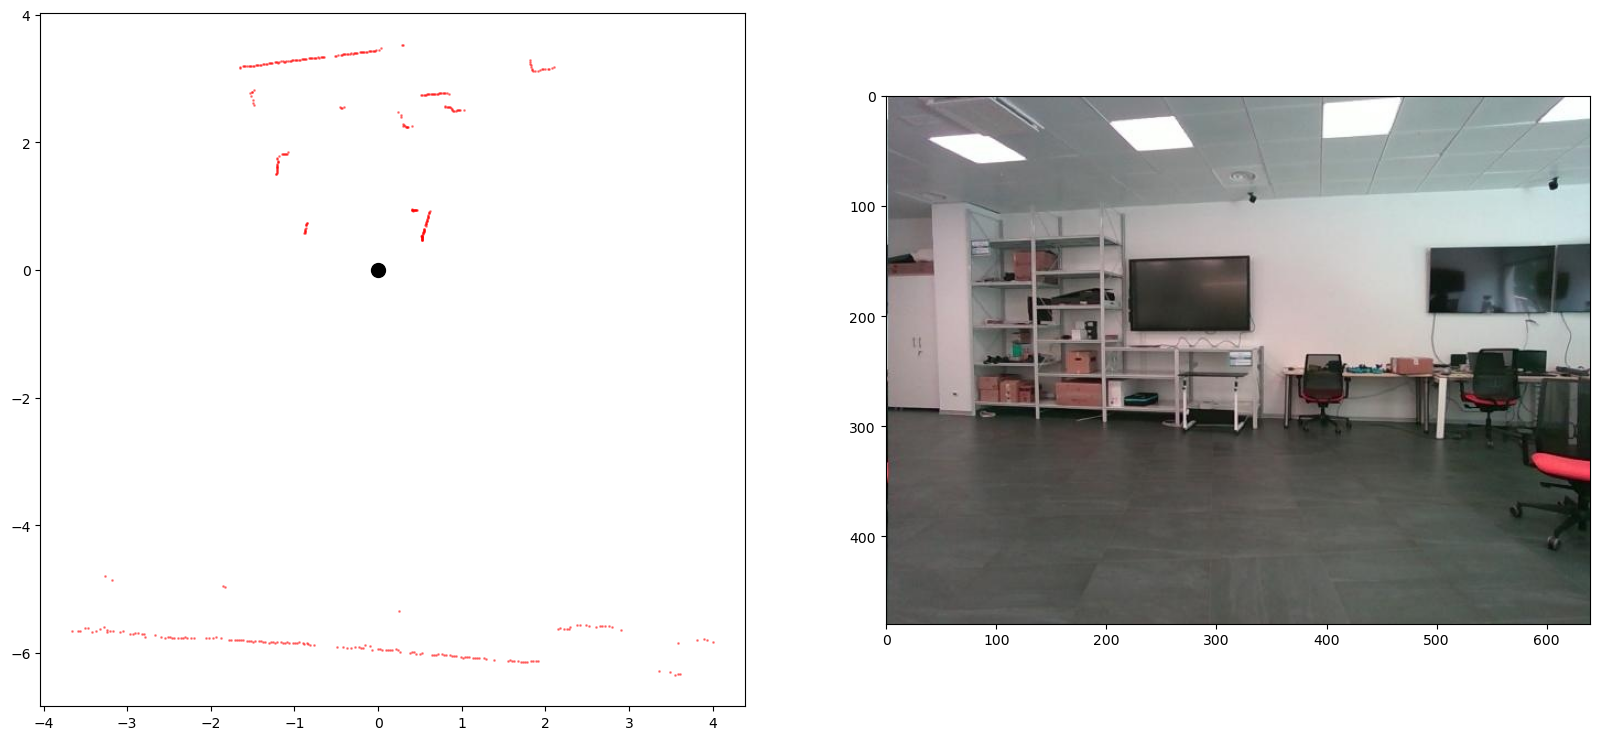

In [8]:
figure = plt.figure(figsize=(20,9))  # Set the figure size
scan = figure.add_subplot(121)  # Add the first subplot (1 row, 2 columns, 1st subplot)
img_plot = figure.add_subplot(122)

scan.plot(0, 0, 'ko', markersize=10)
scan.plot(x, y, 'ro', markersize=1, alpha=0.4)
scan.plot(x_dets, y_dets, 'go', markersize=1, alpha=0.4)

for angle in angles_to_det:
    centre_x = 6 *  -np.sin(angle)
    centre_y = 6 * np.cos(angle)
    scan.plot([0, -centre_x], [0, -centre_y])

for det in xy_det_markers:
    scan.plot(-det[1]+0.2, det[0]+0.1, 'go', markersize=35, alpha=0.2)

img_plot.imshow(image)